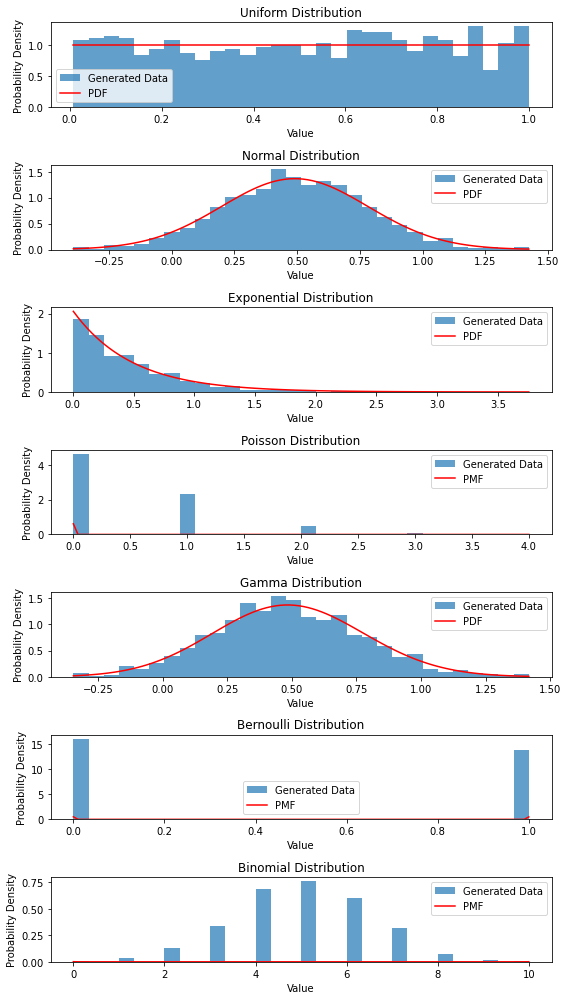

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, expon, poisson, gamma, bernoulli, binom

# Generate random data
np.random.seed(42)  # Set seed for reproducibility
data_size = 1000  # Number of data points to generate
data = np.random.rand(data_size)  # Generate random data between 0 and 1

# Define the top 5 distributions
distributions = [
    ("Uniform", uniform),
    ("Normal", norm),
    ("Exponential", expon),
    ("Poisson", poisson),
    ("Gamma", gamma),
    ("Bernoulli", bernoulli),
    ("Binomial", binom)
]

# Plot the data distribution for each distribution
fig, axs = plt.subplots(7, 1, figsize=(8, 14))
for i, (dist_name, dist) in enumerate(distributions):
    # Generate data from the distribution
    if dist_name == "Bernoulli":
        p_param = np.mean(data)  # Estimate p using sample mean
        fitted_data = dist(p_param).rvs(data_size)
    elif dist_name == "Binomial":
        n_param = 10  # Number of trials
        p_param = np.mean(data)  # Estimate p using sample mean
        fitted_data = dist(n=n_param, p=p_param).rvs(data_size)
    elif dist_name == "Poisson":
        lambda_param = np.mean(data)  # Estimate lambda using sample mean
        fitted_data = dist(mu=lambda_param).rvs(data_size)
    else:
        params = dist.fit(data)
        fitted_data = dist(*params).rvs(data_size)

    # Plot the histogram of the data
    axs[i].hist(fitted_data, bins=30, density=True, alpha=0.7, label='Generated Data')
    axs[i].set_title(dist_name + " Distribution")
    axs[i].set_xlabel("Value")
    axs[i].set_ylabel("Probability Density")

    # Plot the probability mass function (PMF) or probability density function (PDF) of the distribution
    x = np.linspace(np.min(fitted_data), np.max(fitted_data), 100)
    if dist_name == "Poisson":
        y = dist.pmf(x, mu=lambda_param)
    elif dist_name == "Bernoulli":
        y = dist.pmf(x, p=p_param)
    elif dist_name == "Binomial":
        y = dist.pmf(x, n=n_param, p=p_param)
    else:
        y = dist.pdf(x, *params)
    axs[i].plot(x, y, 'r-', label='PMF' if dist_name in ["Poisson", "Bernoulli", "Binomial"] else 'PDF')

    axs[i].legend()

plt.tight_layout()
plt.show()


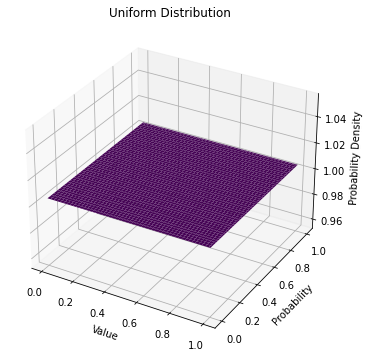

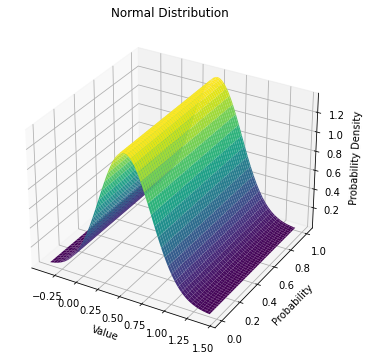

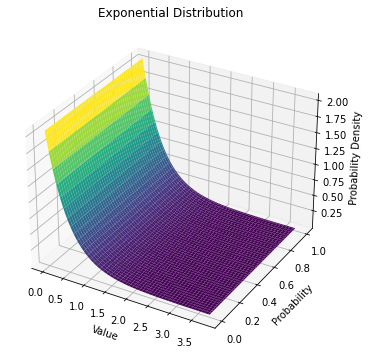

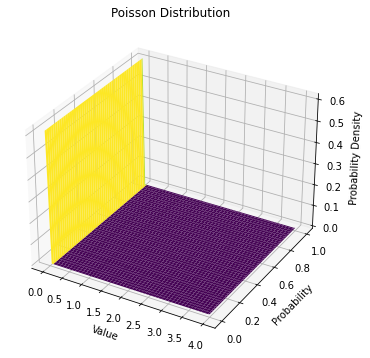

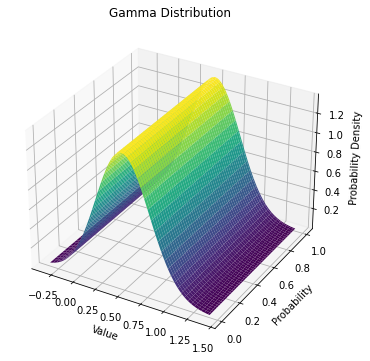

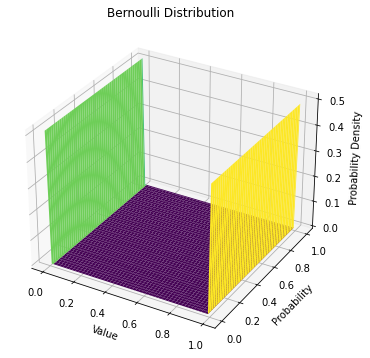

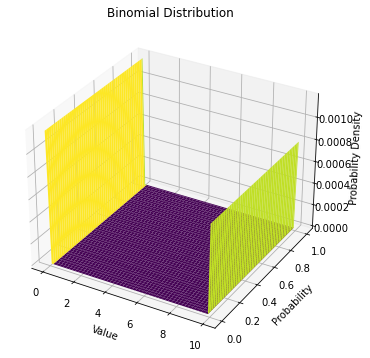

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import uniform, norm, expon, poisson, gamma, bernoulli, binom

# Generate random data
np.random.seed(42)  # Set seed for reproducibility
data_size = 1000  # Number of data points to generate
data = np.random.rand(data_size)  # Generate random data between 0 and 1

# Define the top 5 distributions
distributions = [
    ("Uniform", uniform),
    ("Normal", norm),
    ("Exponential", expon),
    ("Poisson", poisson),
    ("Gamma", gamma),
    ("Bernoulli", bernoulli),
    ("Binomial", binom)
]

# Create separate 3D plots for each distribution
for dist_name, dist in distributions:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Generate data from the distribution
    if dist_name == "Bernoulli":
        p_param = np.mean(data)  # Estimate p using sample mean
        fitted_data = dist(p_param).rvs(data_size)
    elif dist_name == "Binomial":
        n_param = 10  # Number of trials
        p_param = np.mean(data)  # Estimate p using sample mean
        fitted_data = dist(n=n_param, p=p_param).rvs(data_size)
    elif dist_name == "Poisson":
        lambda_param = np.mean(data)  # Estimate lambda using sample mean
        fitted_data = dist(mu=lambda_param).rvs(data_size)
    else:
        params = dist.fit(data)
        fitted_data = dist(*params).rvs(data_size)

    # Prepare grid points for 3D plotting
    x = np.linspace(np.min(fitted_data), np.max(fitted_data), 100)
    y = np.linspace(0, 1, 100)
    X, Y = np.meshgrid(x, y)

    # Calculate probability density function (PDF) or probability mass function (PMF) values
    if dist_name == "Poisson":
        Z = dist.pmf(X, mu=lambda_param)
    elif dist_name == "Bernoulli":
        Z = dist.pmf(X, p=p_param)
    elif dist_name == "Binomial":
        Z = dist.pmf(X, n=n_param, p=p_param)
    else:
        Z = dist.pdf(X, *params)

    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability')
    ax.set_zlabel('Probability Density')
    ax.set_title(dist_name + " Distribution")

    plt.show()
